In [7]:

import pandas as pd
import sys

sys.path.insert(1, '../')

from rule_benchmark import *

In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
FOLDERS = ["approach1", "approach2"]

In [10]:
train = pd.read_pickle("train.pkl")
test = pd.read_pickle("test.pkl")


Number of rules:  44
Number of input variables:  4
Number of output variables:  3

approach1/:

Container_DataLayout:
Train: 0.9999138828088557
Test: 0.9999129475944518

Traversal:
Train: 0.9920174690170785
Test: 0.9873622909975085

Newton 3:
Train: 0.980682285244554
Test: 0.9831259228010968


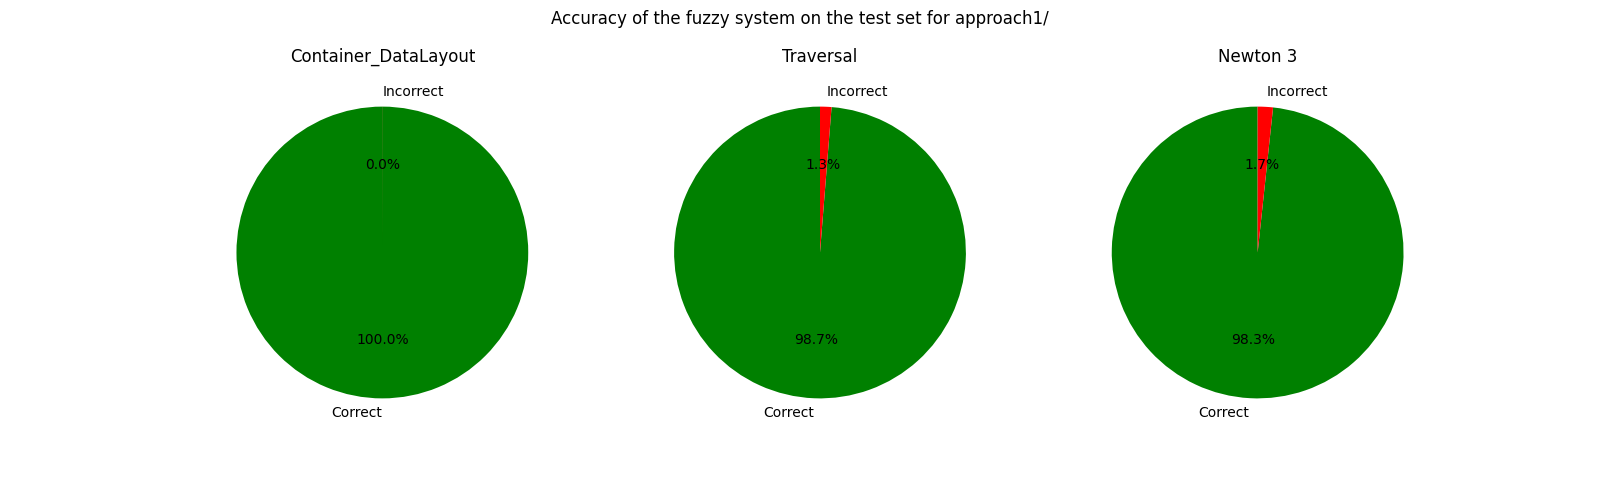

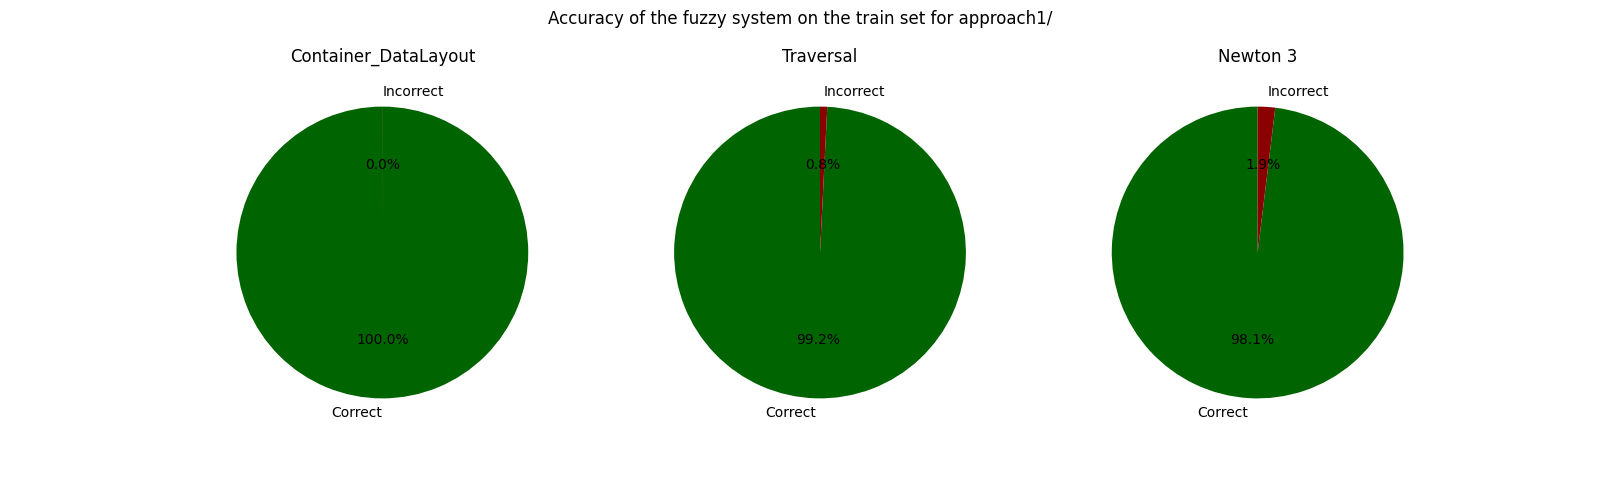

Number of rules:  44
Number of input variables:  4
Number of output variables:  3

approach2/:

Container_DataLayout:
Train: 0.9989761237752591
Test: 0.9991350727980395

Traversal:
Train: 0.991810816094534
Test: 0.986554218313875

Newton 3:
Train: 0.980682285244554
Test: 0.9831259228010968


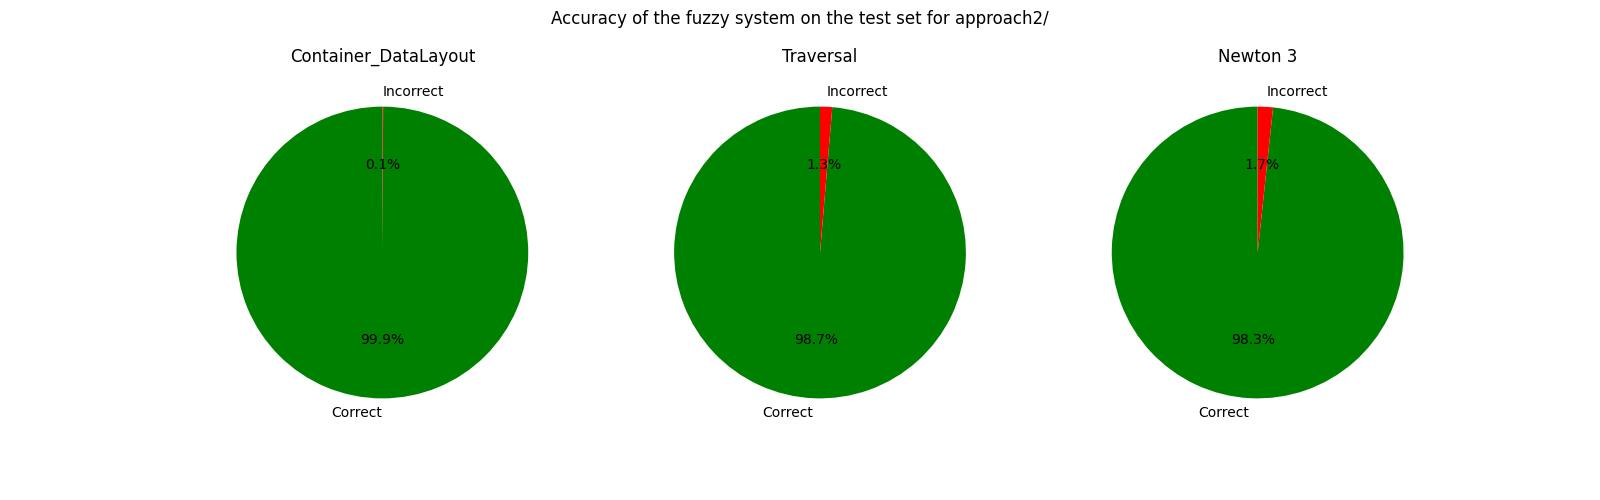

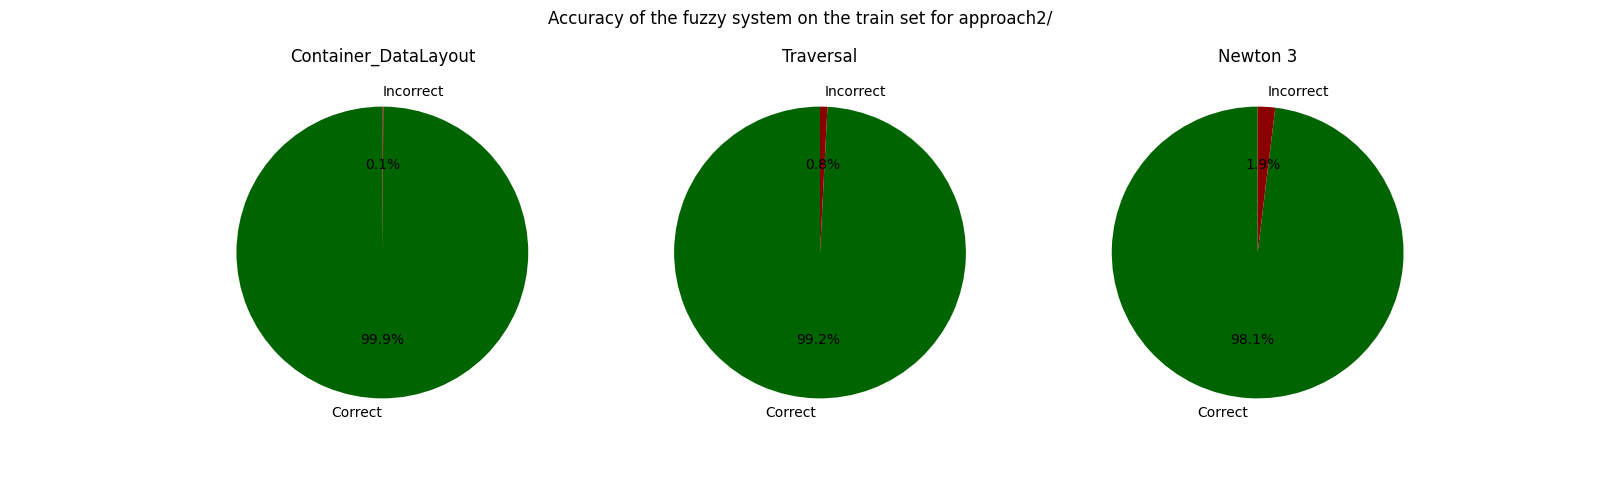

In [11]:
# The K parameter selects how many defuzzified predictions are used in order of decreasing confidence

fiss, algo_ranking = benchmark_rules("approach1/", train, test, K=1, n=600)
fiss, algo_ranking = benchmark_rules("approach2/", train, test, K=1, n=600)

# Findings

- MoM works way better than the other methods.
- This is probably since the output variable is categorical and therefore interpolating between them is not a good idea.
  - Also the placement on the x-axis is somehow arbitrary. This also makes interpolation meaningless
- Traversal is very hard to predict. Maybe because there are so many possible values.

Union:  "("("("("("("("("("("("("("("("(Traversal is "vcl_c06, vlc_c18, vlc_sliced_c02": Gaussian(9.166666666666668, 0.07575757575757576))↑0.04" or "(Traversal is "lc_c04, lc_c08, lc_c18, lc_sliced, lc_sliced_balanced, lc_sliced_c02, vcl_c06, vlc_c18, vlc_sliced_c02": Gaussian(2.5, 0.07575757575757576))↑0.41")" or "(Traversal is "vcl_c06, vcl_cluster_iteration, vlc_c18, vlc_sliced_c02": Gaussian(7.5, 0.07575757575757576))↑0.03")" or "(Traversal is "lc_c01, lc_c04, lc_c08, lc_sliced, lc_sliced_balanced, lc_sliced_c02, vcl_c06, vl_list_iteration, vlc_c01, vlc_c18, vlc_sliced_c02": Gaussian(0.8333333333333334, 0.07575757575757576))↑0.03")" or "(Traversal is "lc_c04, lc_c08, lc_sliced, lc_sliced_balanced, lc_sliced_c02, vcl_c06, vlc_c18, vlc_sliced_c02": Gaussian(5.0, 0.07575757575757576))↑0.59")" or "(Traversal is "lc_c04, lc_c08, lc_sliced, lc_sliced_balanced, lc_sliced_c02, vcl_c06, vl_list_iteration, vlc_c01, vlc_c18, vlc_sliced_c02": Gaussian(3.3333333333333335, 0.07575757575757576))↑

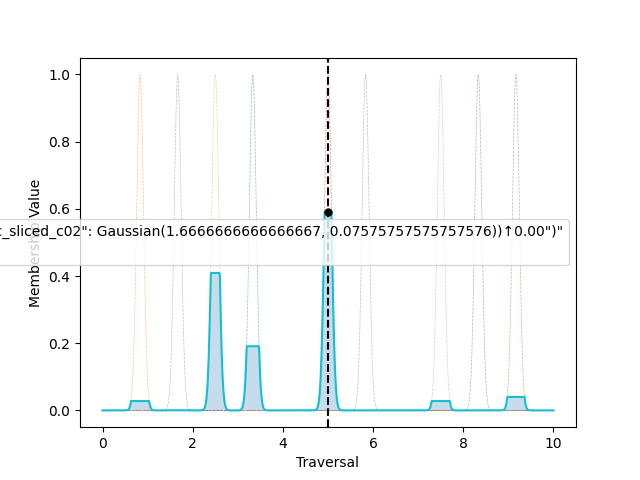

In [12]:
data = {"maxDensity": 0.2, "maxParticlesPerCell": 5,  "homogeneity": 0.5,
        "particlesPerCellStdDev": 1, "avgParticlesPerCell": 1.2, "threadCount": 10}


union = fiss["Traversal"].applyRules(data)

fig, ax = plt.subplots()
union.plot(ax=ax, n=1000)

print("Union: ", union)

prediction = fiss["Traversal"].predictClosest(
    data, algo_ranking["Traversal"], n=600)[1]

print("Prediction: ", prediction)